# Data Science Project
## Analysing Historical Stock/ Revenue Data and Building a Dashboard

This project is from the IBM Data Science Professional Certifiticate - Python Project for Data Science

**Using the yfinance Library to extract stock data**

Using the `Ticker` module we can create an object that will allow us to access functions to extract data.

`AAPL` - Apple Inc

`GOOG` - Google

`MSFT` - Microsoft

`AMZN` - Amazon.com, Inc.


## 1.Check the price of stock overtime
## 2.Analysis of Moving Average of various stocks
## 3.Daily Return of stock on average
## 4.Correlation between different stock's closing price
## 5.How much value is at risk by investing in a particular stock


## 1.Check the price of stock overtime

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## reading stock data from Yahoo
import yfinance as yf
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
yf.pdr_override()
## converting timestamps
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#setup starting and end date
end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['Apple', 'Google', 'Microsoft','Amazon']
for company, com_name in zip(company_list,company_name):
  company["company_name"]=com_name
df = pd.concat(company_list, axis = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-19,149.309998,154.559998,149.100006,154.479996,153.568970,81474200,Apple
2022-09-20,153.399994,158.080002,153.080002,156.899994,155.974701,107689800,Apple
2022-09-21,157.339996,158.740005,153.600006,153.720001,152.813446,101696800,Apple
2022-09-22,152.380005,154.470001,150.910004,152.740005,151.839218,86652500,Apple
2022-09-23,151.190002,151.470001,148.559998,150.429993,149.542862,96029900,Apple


## Performing descriptive statistics

In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,160.891721,162.663440,159.319320,161.072000,160.625065,6.882356e+07
std,19.145862,18.881977,19.378216,19.106791,19.289000,2.317027e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,145.812500,147.320004,143.957497,145.915001,145.256310,5.126040e+07
50%,156.700005,158.285004,154.214996,157.149994,156.472656,6.416920e+07
75%,177.619999,179.447498,176.565006,177.532497,177.532497,8.047782e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [6]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,107.935404,109.437180,106.782792,108.126220,108.126220,2.689394e+07
std,15.034610,15.078140,15.055083,15.072970,15.072970,1.099501e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.749998,97.344997,94.440002,95.835001,95.835001,2.048948e+07
50%,102.799999,104.459999,102.035000,103.660000,103.660000,2.419755e+07
75%,122.100002,123.926249,121.519999,122.850002,122.850002,3.010655e+07
max,138.800003,139.550003,137.179993,138.990005,138.990005,9.779860e+07


In [7]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,281.322840,284.530440,278.415119,281.546040,280.283731,2.898051e+07
std,41.330004,41.305674,41.180601,41.186655,41.739759,1.106181e+07
min,217.550003,220.410004,213.429993,214.250000,212.199982,9.200800e+06
25%,243.120003,245.382500,240.187500,242.482498,240.470966,2.191255e+07
50%,274.339996,276.660004,269.684998,273.035004,271.863831,2.665685e+07
75%,325.620003,328.922508,322.345001,325.755013,325.066765,3.187055e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,8.610200e+07


In [8]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,110.380640,111.973200,108.760240,110.397640,110.397640,6.622984e+07
std,16.853589,16.906833,16.908709,16.914274,16.914274,2.654405e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.826480e+07
25%,95.992498,97.447498,94.157501,96.229998,96.229998,4.979000e+07
50%,105.150002,106.705002,104.215000,105.555000,105.555000,5.944715e+07
75%,126.292501,127.617502,124.875000,126.600000,126.600000,7.278935e+07
max,145.080002,145.860001,142.949997,144.850006,144.850006,2.231334e+08


## Closing Price Analysis

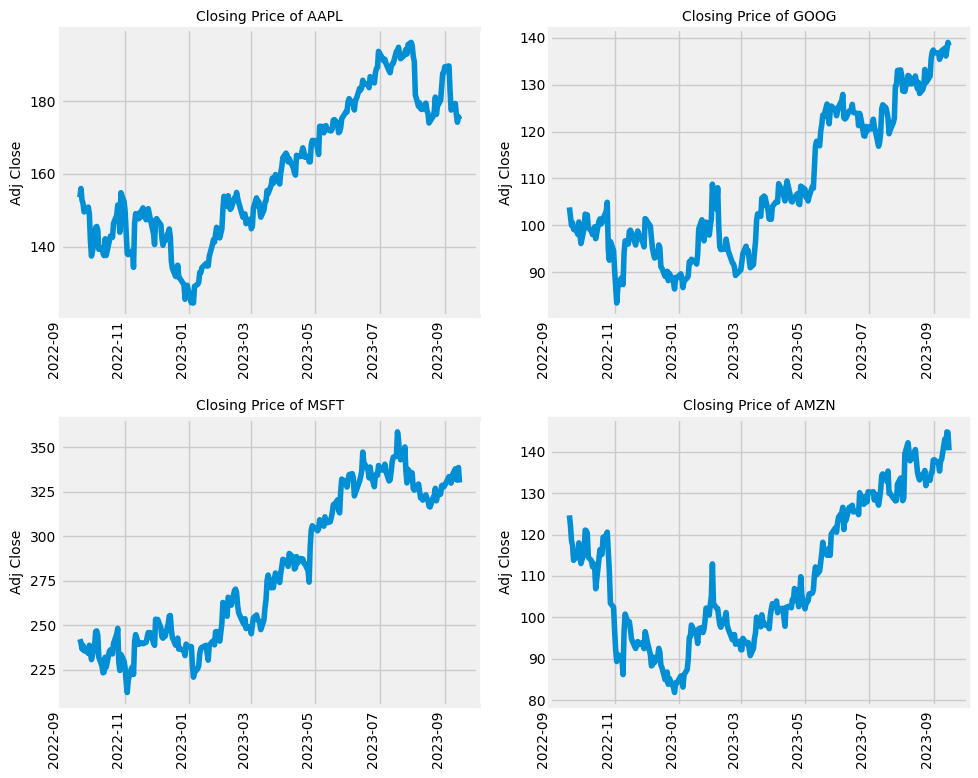

In [11]:
plt.figure(figsize = (10,8), facecolor = 'white')
plt.style.use('fivethirtyeight')
plt.subplots_adjust(top = 1.25, bottom = 1.2)
for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company["Adj Close"].plot()
  plt.ylabel("Adj Close",fontsize=10)
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i-1]}",fontsize=10)
  plt.xticks(fontsize=10, rotation=90)
  plt.yticks(fontsize=10)
plt.tight_layout()


## Volume of Sales

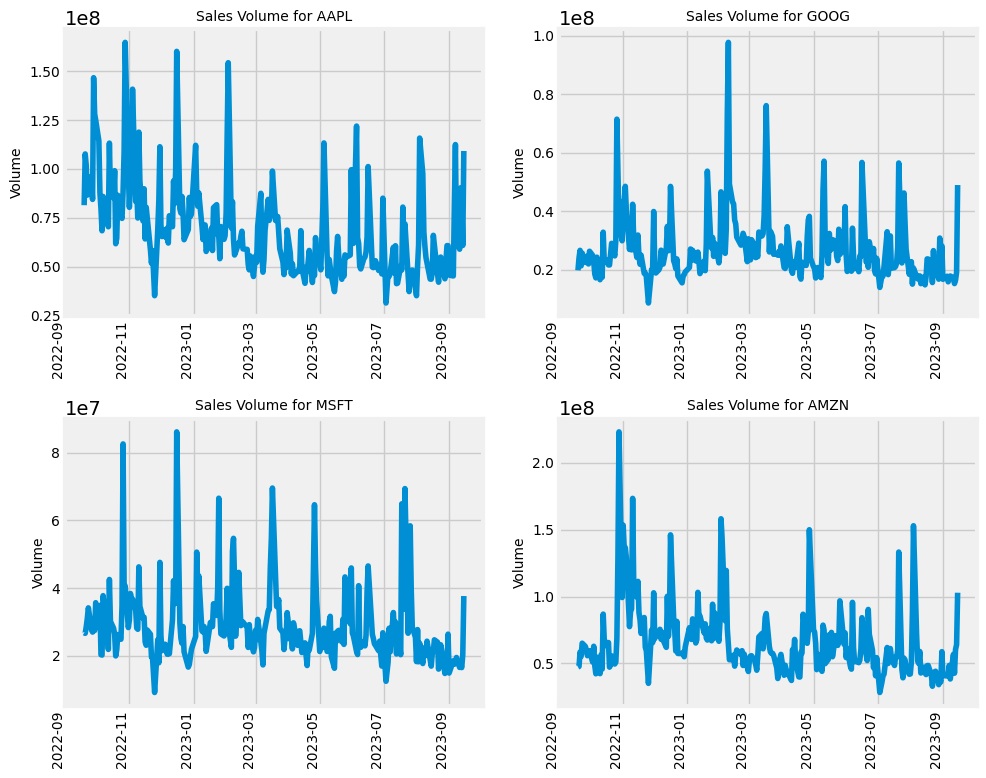

In [13]:
plt.figure(figsize = (10,8), facecolor = 'white')
plt.style.use('fivethirtyeight')
plt.subplots_adjust(top = 1.25, bottom = 1.2)
for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company["Volume"].plot()
  plt.ylabel("Volume",fontsize=10)
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i-1]}",fontsize=10)
  plt.xticks(fontsize=10, rotation=90)
  plt.yticks(fontsize=10)
plt.tight_layout()

## 2. Analysis of Moving average of various stocks

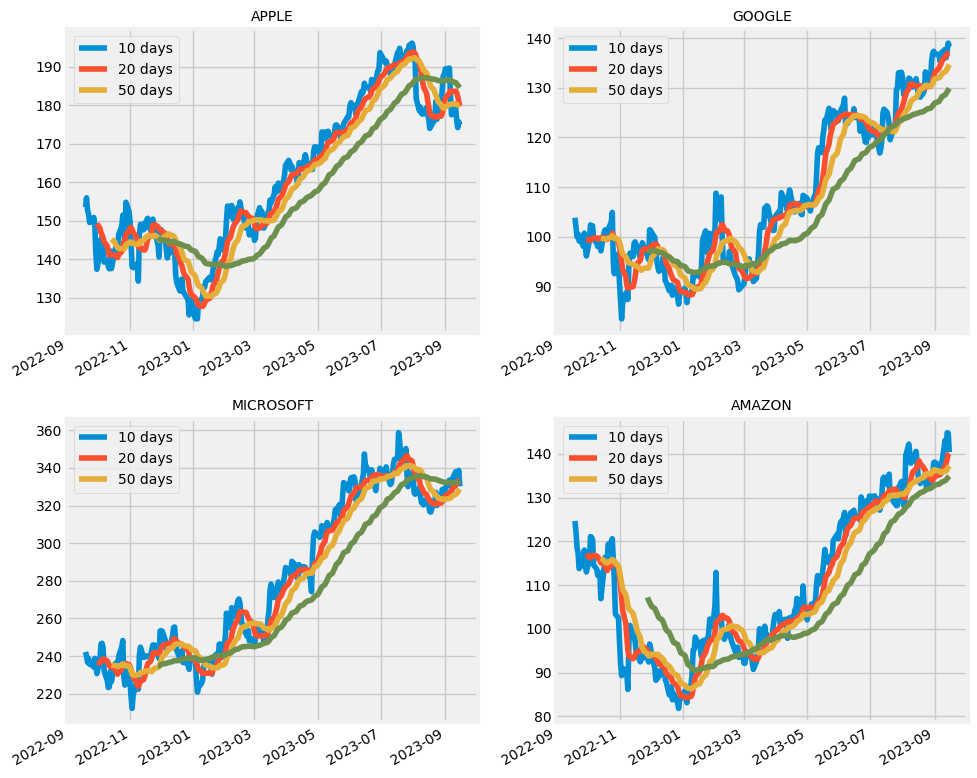

In [60]:
#Plotting moving average of stocks over 10,20,50 days
ma_day = [10,20,50]
for ma in ma_day:
    for company in company_list:
        column_name = f"Moving Average for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()

fig,axes = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(10)
plt.style.use("fivethirtyeight")
fig.patch.set_facecolor('white')

AAPL[["Adj Close","Moving Average for 10 days","Moving Average for 20 days","Moving Average for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("APPLE", fontsize = 10)
axes[0,0].set_xlabel(None)
axes[0,0].legend(['10 days','20 days','50 days'],fontsize = 10)
axes[0,0].tick_params(axis='both', which='major', labelsize=10)

GOOG[["Adj Close","Moving Average for 10 days","Moving Average for 20 days","Moving Average for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("GOOGLE",fontsize=10)
axes[0,1].legend(['10 days','20 days','50 days'],fontsize = 10)
axes[0,1].set_xlabel(None)
axes[0,1].tick_params(axis='both', which='major', labelsize=10)

MSFT[["Adj Close","Moving Average for 10 days","Moving Average for 20 days","Moving Average for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title("MICROSOFT",fontsize=10)
axes[1,0].legend(['10 days','20 days','50 days'],fontsize = 10)
axes[1,0].set_xlabel(None)
axes[1,0].tick_params(axis='both', which='major', labelsize=10)

AMZN[["Adj Close","Moving Average for 10 days","Moving Average for 20 days","Moving Average for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("AMAZON",fontsize=10)
axes[1,1].legend(['10 days','20 days','50 days'],fontsize = 10)
axes[1,1].set_xlabel(None)
axes[1,1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()

## 3. Daily return of stock on average

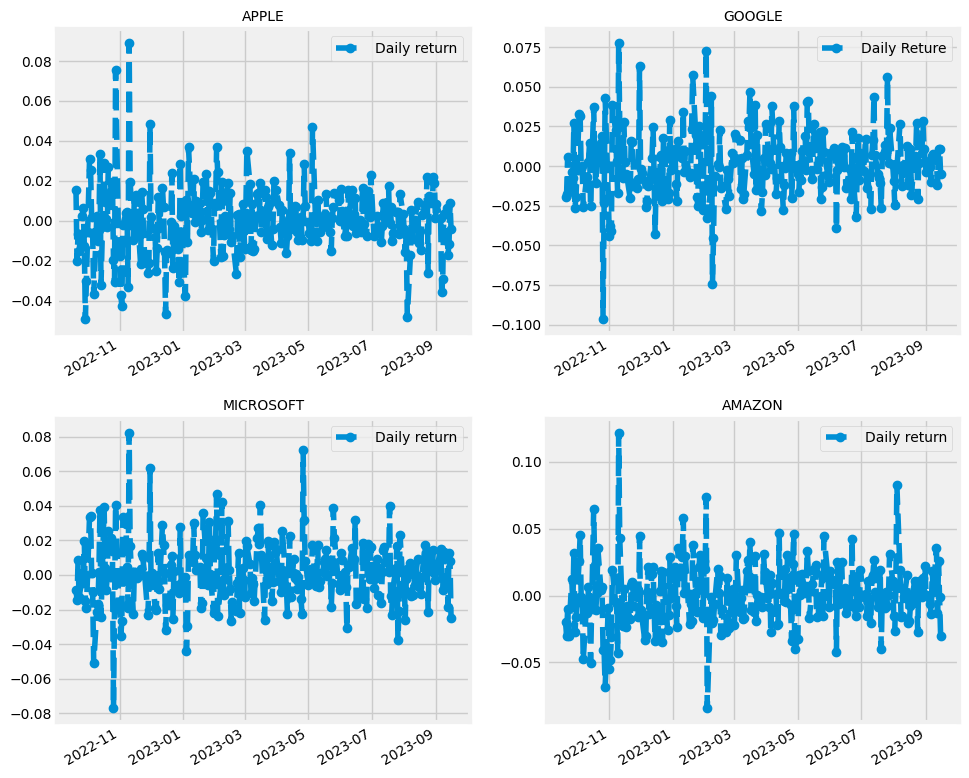

In [61]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()

fig,axes = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(10)
fig.patch.set_facecolor('white')


AAPL["Daily Return"].plot(ax = axes[0,0], legend=True, linestyle="--",marker="o")
axes[0,0].set_title("APPLE", fontsize = 10)
axes[0,0].set_xlabel(None)
axes[0,0].legend(['Daily return'],fontsize = 10)
axes[0,0].tick_params(axis='both', which='major', labelsize=10)


GOOG["Daily Return"].plot(ax = axes[0,1], legend=True, linestyle="--",marker="o")
axes[0,1].set_title("GOOGLE", fontsize = 10)
axes[0,1].set_xlabel(None)
axes[0,1].legend(['Daily Reture'],fontsize = 10)
axes[0,1].tick_params(axis='both', which='major', labelsize=10)


MSFT["Daily Return"].plot(ax = axes[1,0], legend=True, linestyle="--",marker="o")
axes[1,0].set_title("MICROSOFT", fontsize = 10)
axes[1,0].set_xlabel(None)
axes[1,0].legend(['Daily return'],fontsize = 10)
axes[1,0].tick_params(axis='both', which='major', labelsize=10)

AMZN["Daily Return"].plot(ax = axes[1,1], legend=True, linestyle="--",marker="o")
axes[1,1].set_title("AMAZON", fontsize = 10)
axes[1,1].set_xlabel(None)
axes[1,1].legend(['Daily return'],fontsize = 10)
axes[1,1].tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()

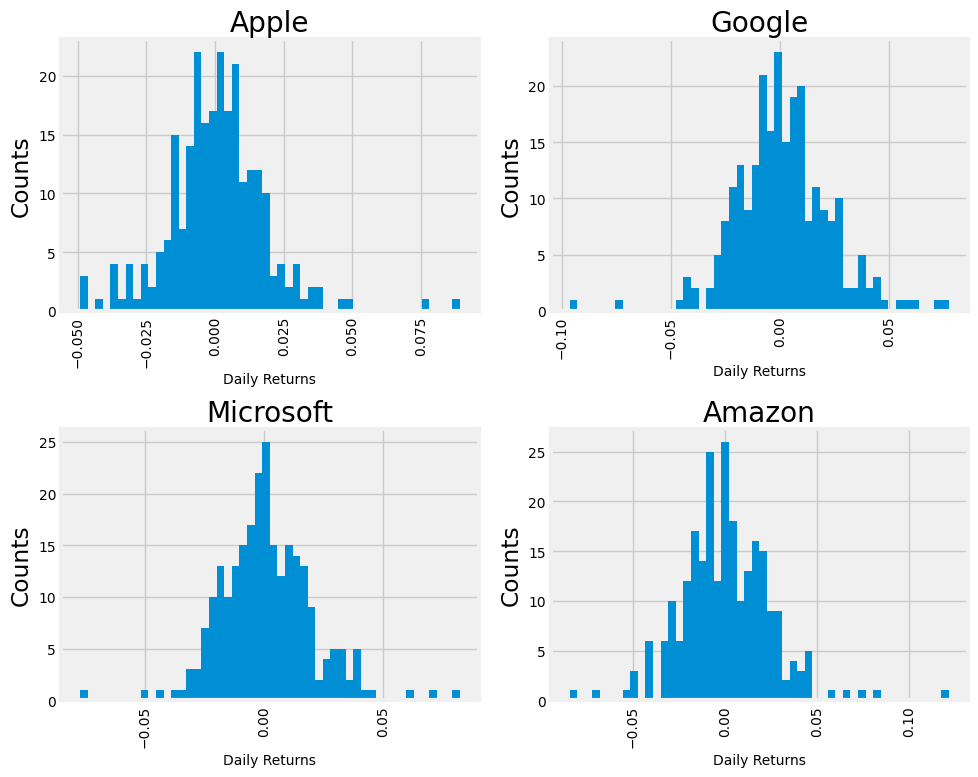

In [63]:
plt.figure(figsize=(10,8),facecolor="white")

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company["Daily Return"].hist(bins=50)
    plt.xlabel("Daily Returns",fontsize=10)
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
plt.tight_layout()

## 4. Correlation between different stock's closing price

In [64]:
closing_df = pdr.get_data_yahoo(tech_list,start=start,end=end)["Adj Close"]
returns = closing_df.pct_change()
returns.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-19,NaN,NaN,NaN,NaN
2022-09-20,0.015666,-0.019814,-0.019451,-0.008465
2022-09-21,-0.020268,-0.029872,-0.017873,-0.014436
2022-09-22,-0.006375,-0.010376,0.005599,0.008495
2022-09-23,-0.015124,-0.030091,-0.013921,-0.012698


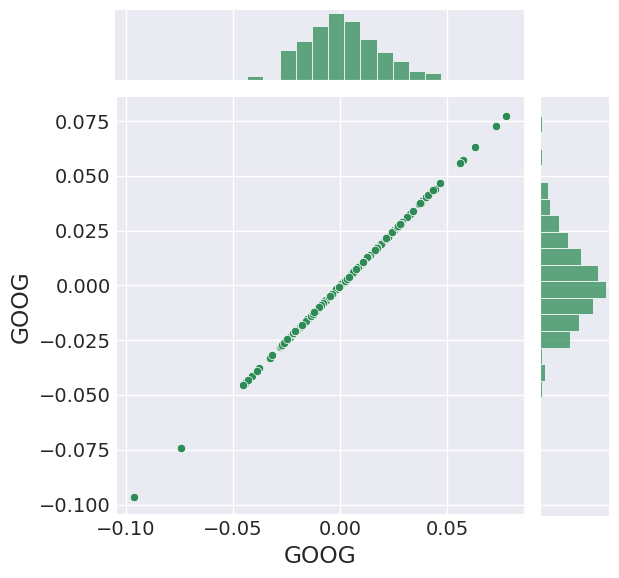

In [71]:
sns.set_style("darkgrid")
sns.jointplot(data=returns, x = "GOOG", y="GOOG", kind = "scatter", color = "seagreen", height = 6)

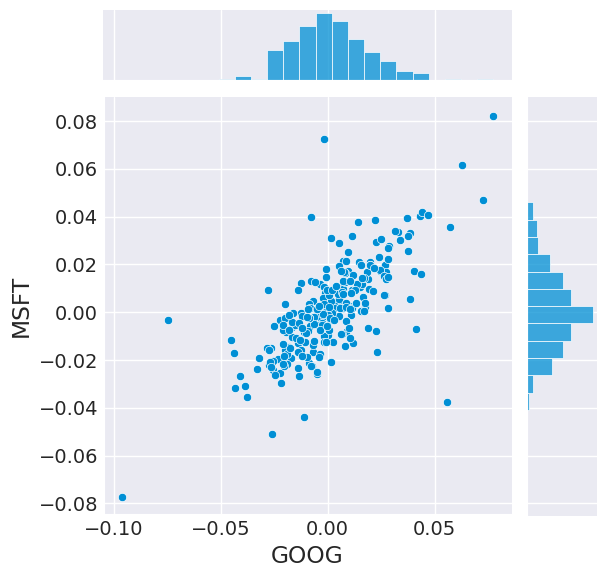

In [72]:
sns.jointplot(data=returns,x="GOOG",y="MSFT",kind="scatter")

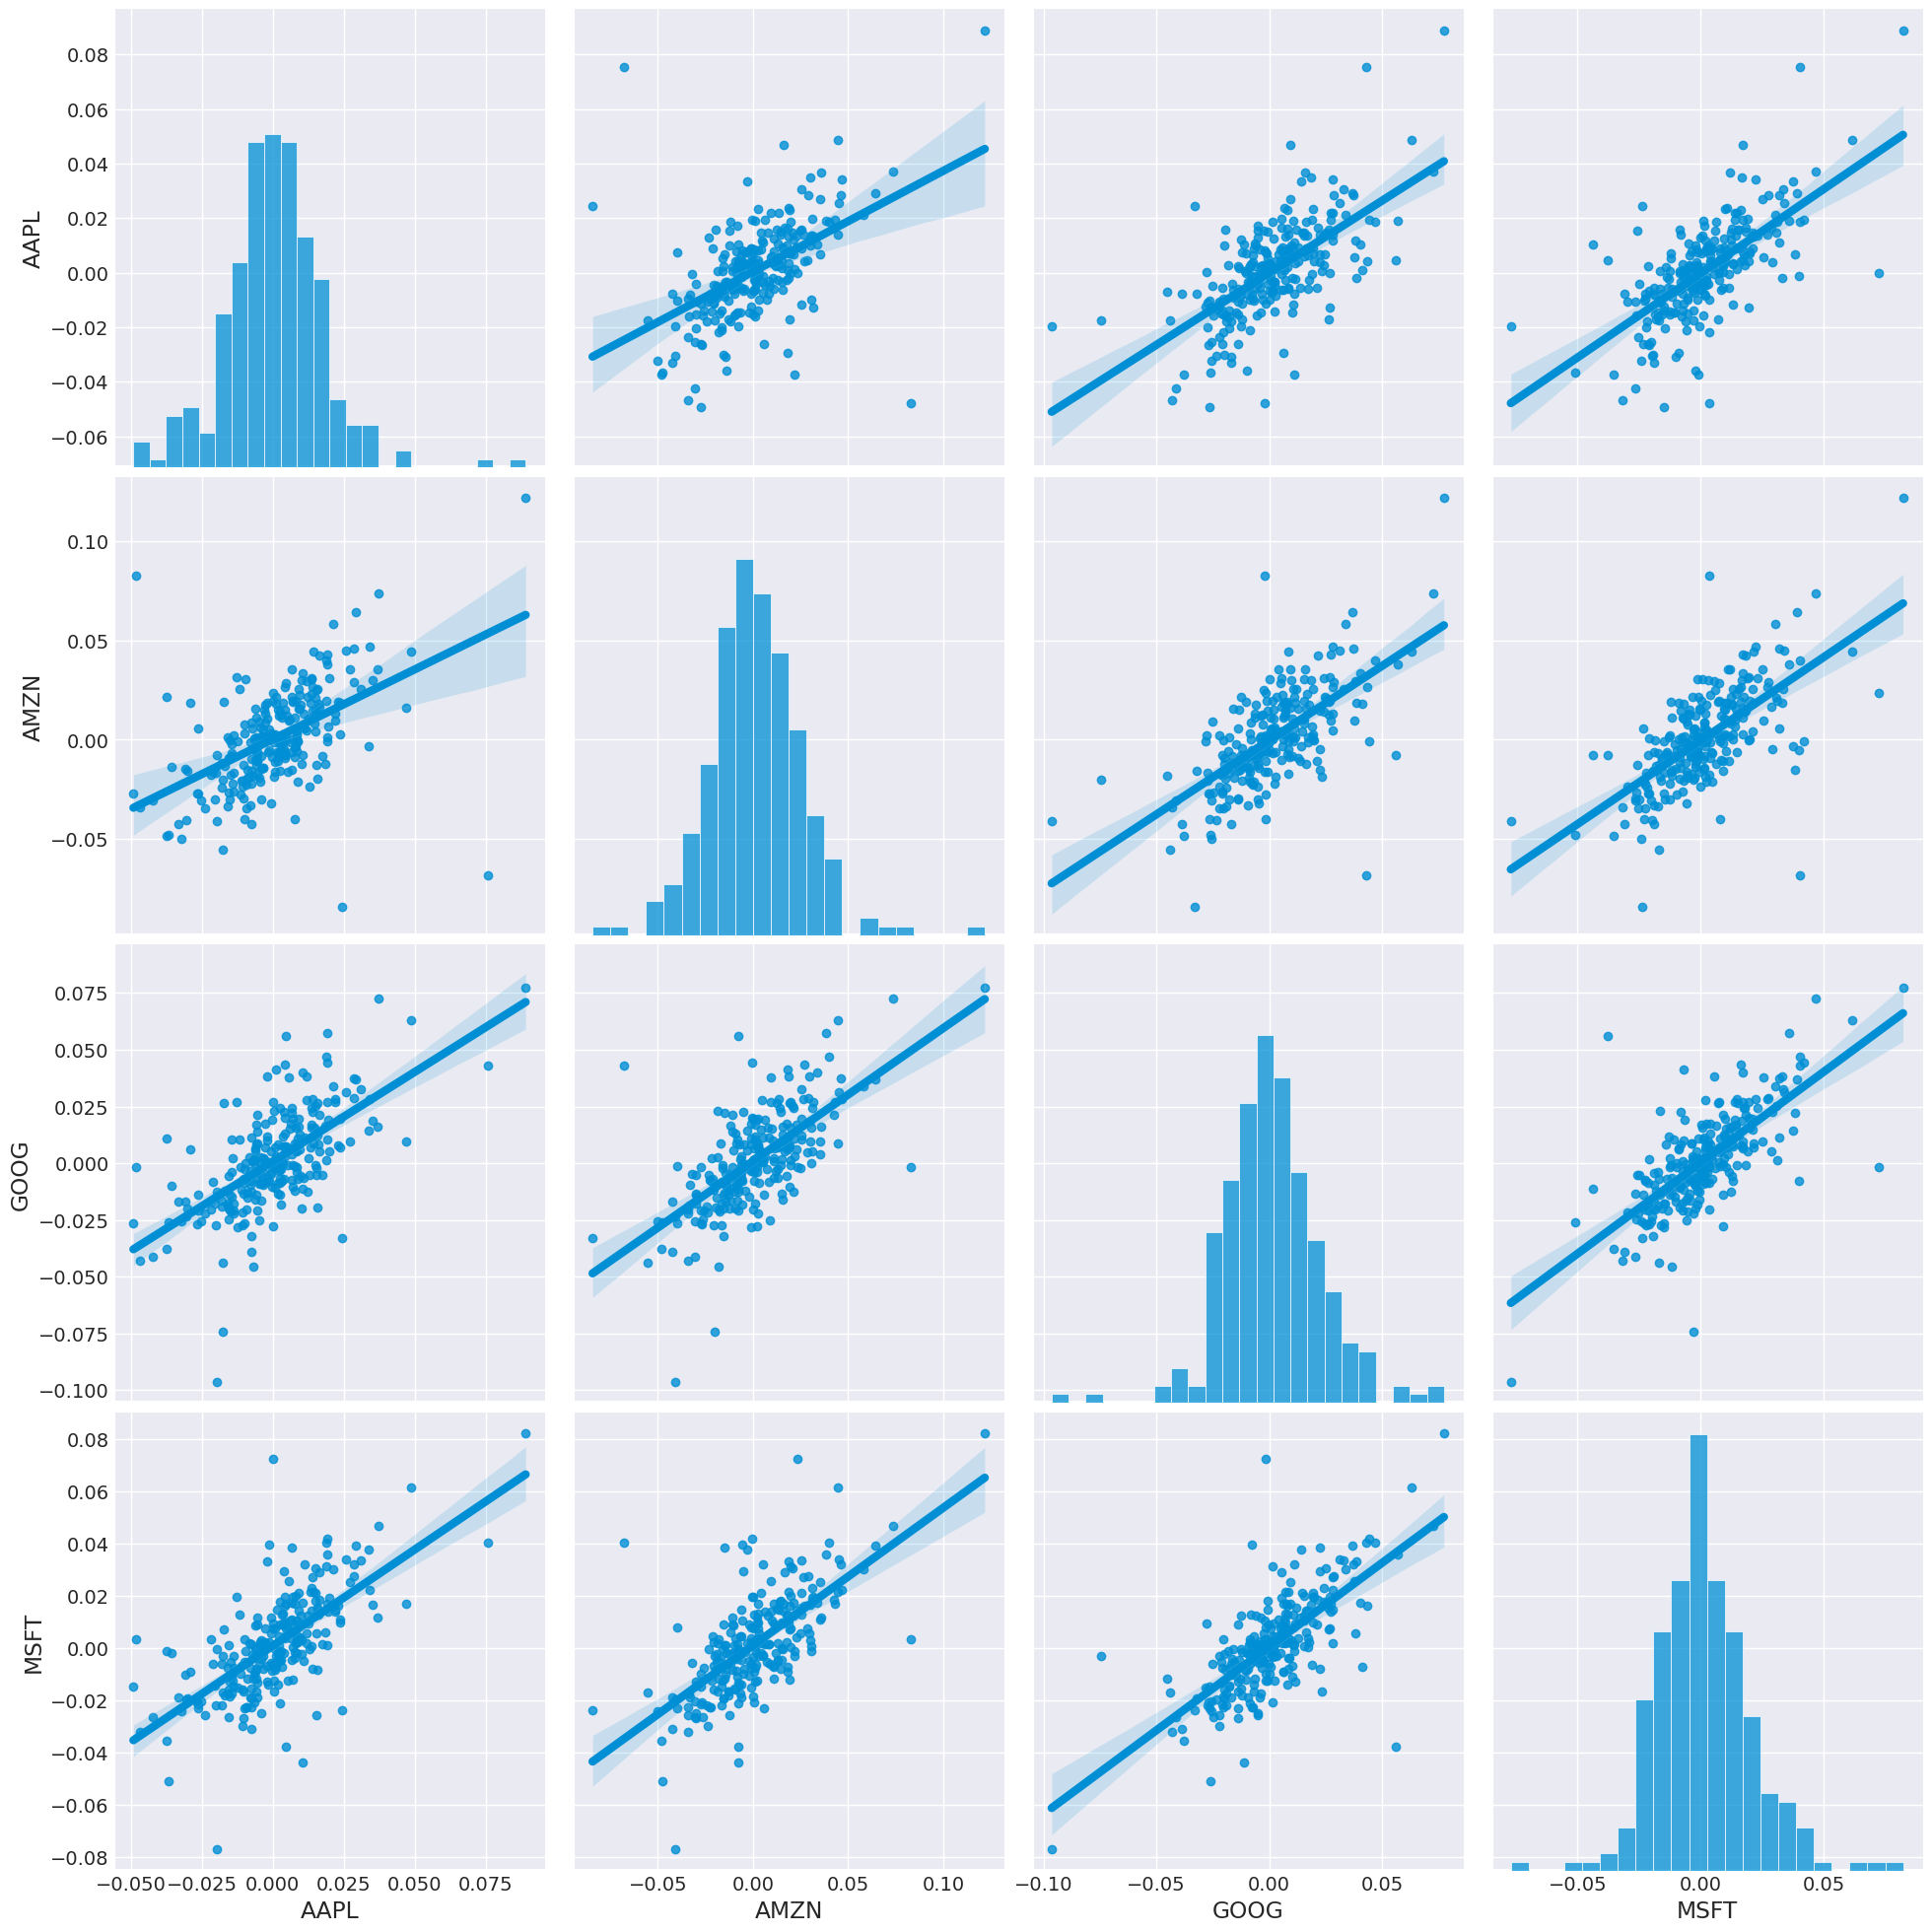

In [73]:
sns.pairplot(returns, kind="reg",height=5)

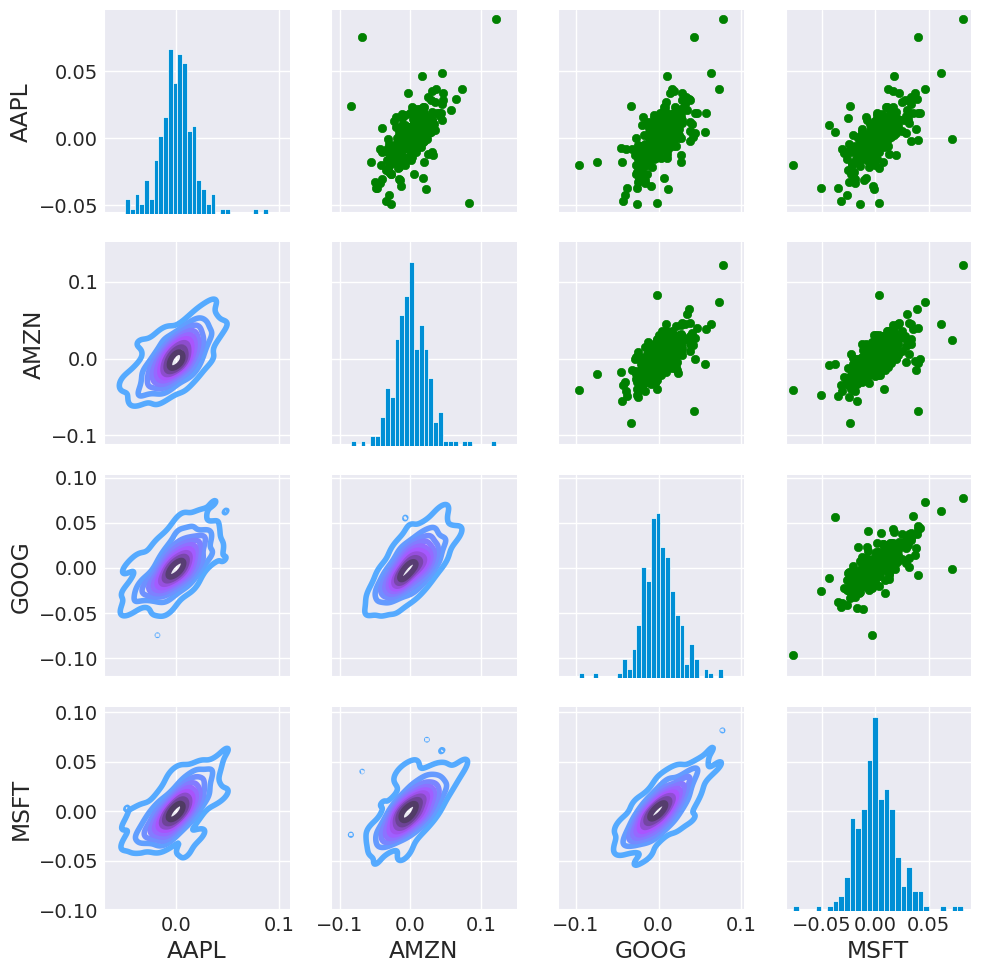

In [74]:
grid = sns.PairGrid(returns.dropna())
grid.map_upper(plt.scatter,color="green")
grid.map_lower(sns.kdeplot,cmap="cool_d")
grid.map_diag(plt.hist,bins=30)


Text(0.5, 1.0, 'Correlation of Stock Closing Price')

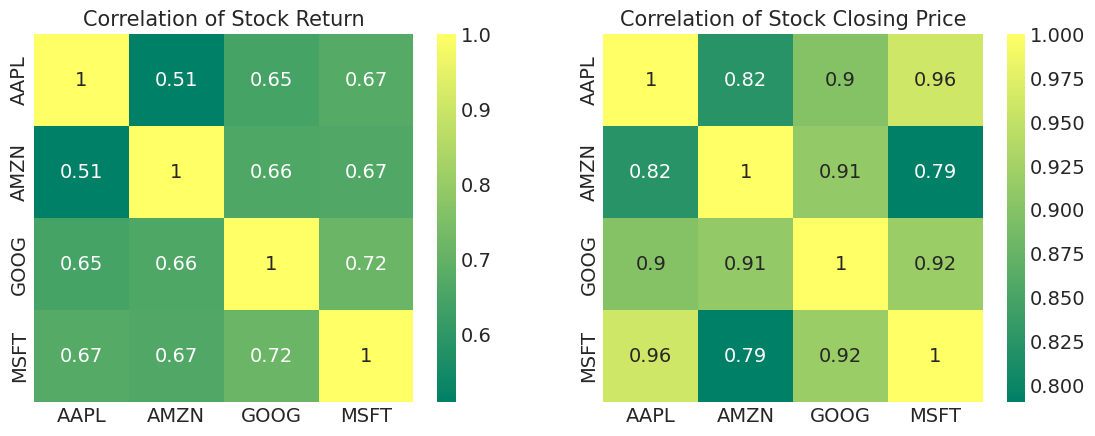

In [75]:
#Finding correlation of stock return;stock closing price
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(returns.corr(),cmap="summer",annot=True)
plt.title("Correlation of Stock Return",fontsize=15)

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(),cmap="summer",annot=True)
plt.title("Correlation of Stock Closing Price",fontsize=15)

## 5.How much value is at risk by investing in a particular stock

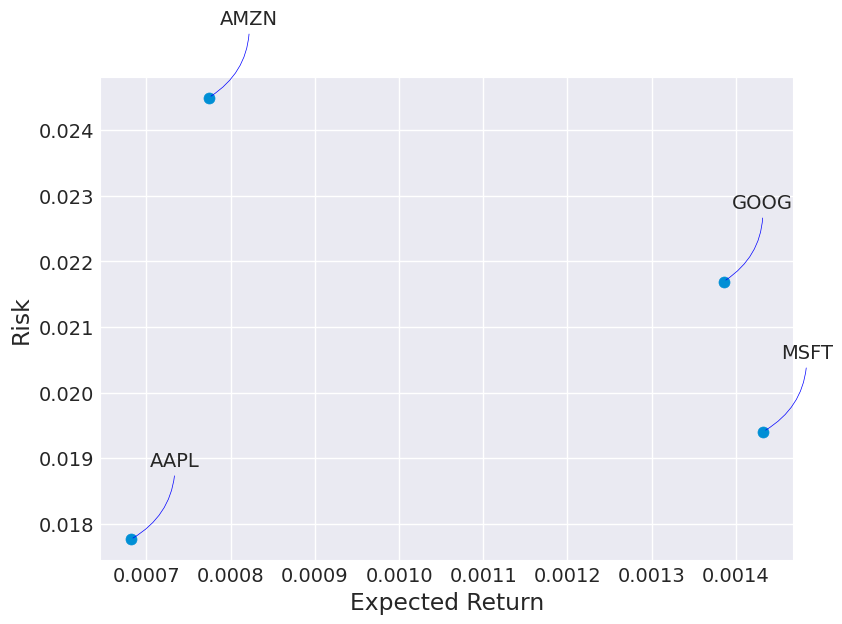

In [77]:
rets = returns.dropna()
area = np.pi*20
plt.figure(figsize=(8,6))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y),xytext=(50,50), textcoords = "offset points",
        ha="right",va="bottom",
        arrowprops=dict(arrowstyle="-",color="blue",connectionstyle="arc3,rad=-0.3"))